In [2]:
from scipy.io import loadmat

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.cm as cm

from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator

%matplotlib inline

## ChanName.mat

通道的名称

一共24个通道，rawTracePersonX之中只包含19个通道[1:8 10:16 19:20 23:24]，不包含9CM 17X3 18X2 21X1 22A2。cm（废弃通道），X1 X2 X3 A2为空通道（什么都没接）。

<img src="./pic1.png" width = "50%" />

In [3]:
ChanName = loadmat('./input/ChanName.mat')
chanName = np.array(ChanName['ChanName'])
chanNamex = chanName.reshape(24,)

chanName = []
for i in range(24):
    chanName.append(chanNamex[i][0][0])
chanName = np.array(chanName)

In [53]:
chanNameUsed = np.append(chanName[0:8], chanName[9:16])
chanNameUsed = np.append(chanNameUsed, chanName[18:20])
chanNameUsed = np.append(chanNameUsed, chanName[22:24])
chanNameUsed[8] = 'EEG F7 - Pz'
chanNameUsed[11] = 'EEG T7 - Pz'
chanNameUsed[-1] = 'EEG T8 - Pz'
chanNameUsed[-2] = 'EEG P8 - Pz'
chanNameUsed[12] = 'EEG P7 - Pz'
chanNameUsed

array(['EEG P3 - Pz', 'EEG C3 - Pz', 'EEG F3 - Pz', 'EEG Fz - Pz',
       'EEG F4 - Pz', 'EEG C4 - Pz', 'EEG P4 - Pz', 'EEG Cz - Pz',
       'EEG F7 - Pz', 'EEG Fp1 - Pz', 'EEG Fp2 - Pz', 'EEG T7 - Pz',
       'EEG P7 - Pz', 'EEG O1 - Pz', 'EEG O2 - Pz', 'EEG F7 - Pz',
       'EEG F8 - Pz', 'EEG P8 - Pz', 'EEG T8 - Pz'], dtype='<U12')

## timeRawTrace.mat

具体时间在timeRawTrace.mat（1x2100）文件中。采样频率300Hz 2100个点共对应7s。每个人的timeRawTrace都是一样的。

In [56]:
timeRawTrace = loadmat('./input/timeRawTrace.mat')
timeRawTrace = np.array(timeRawTrace['timeRawTrace'])
timeRawTrace = timeRawTrace.reshape(2100,)
timeRawTrace

array([0.00000000e+00, 3.33333333e+00, 6.66666667e+00, ...,
       6.99000000e+03, 6.99333333e+03, 6.99666667e+03])

## OSPerson1

* OS：要分析的数据，36x52x40x54 time X freq X Trial x pair
* Time：对应的时间点在Time变量中
* fOS：对应的频率
* Trial：同样为40个Trail或10个Trial，顺序和Track对应。
* Pair：这里Pair指的是54个感兴趣的两个通道之间的配对。对应的Pair编号在Pair54.mat文件中。
* track1: 40个trial对应的图片编号。<11的编号为记忆过的图片，>10的是没有记忆过的。

In [5]:
OSPerson1 = loadmat('./input/Person1/OSPerson1.mat')

os1 = OSPerson1['OS']
time1 = OSPerson1['Time'] # why only 36?
freq1 = OSPerson1['fOS'] # eeg freq?
track1 = OSPerson1['Track'] # true label
# pair54?

In [6]:
pair54 = loadmat('./input/Pair54.mat')
pair54 = np.array(pair54['Pair54'])
pair54

array([[ 1, 12],
       [ 2, 12],
       [ 3, 12],
       [ 4, 12],
       [ 5, 12],
       [ 6, 12],
       [ 7, 12],
       [ 8, 12],
       [10, 12],
       [11, 12],
       [12, 13],
       [12, 14],
       [12, 15],
       [12, 16],
       [12, 19],
       [12, 20],
       [12, 23],
       [12, 24],
       [ 1, 24],
       [ 2, 24],
       [ 3, 24],
       [ 4, 24],
       [ 5, 24],
       [ 6, 24],
       [ 7, 24],
       [ 8, 24],
       [10, 24],
       [11, 24],
       [12, 24],
       [13, 24],
       [14, 24],
       [15, 24],
       [16, 24],
       [19, 24],
       [20, 24],
       [23, 24],
       [ 1,  7],
       [ 2,  7],
       [ 3,  7],
       [ 4,  7],
       [ 5,  7],
       [ 6,  7],
       [ 7,  8],
       [ 7, 10],
       [ 7, 11],
       [ 7, 12],
       [ 7, 13],
       [ 7, 14],
       [ 7, 15],
       [ 7, 16],
       [ 7, 19],
       [ 7, 20],
       [ 7, 23],
       [ 7, 24]], dtype=uint8)

In [7]:
time1.shape

(1, 36)

In [8]:
track1

array([[18, 16, 16, 17,  8, 12, 19, 18, 10, 15, 20, 18,  9, 15, 18, 19,
        13, 12,  6,  2,  7, 16, 12, 12, 13, 11, 10,  5,  9,  2,  5,  5,
         2, 10,  2,  4,  1,  3,  8,  5]], dtype=uint8)

## rawTracePersonX

* dataTrial 2100x40x19 时间 x Trial x 通道，包含了各通道各Trail的Rawtrace
* 时间：包含2100个数据点，对应2100个RawTrace的时间。具体时间在timeRawTrace.mat（1x2100）文件中。采样频率300Hz 2100个点共对应7s。每个人的timeRawTrace都是一样的。
* Trial：一共40个Trial，有些人是10个Trial。
* 通道：一共24个通道，此处只包含19个通道[1:8 10:16 19:20 23:24]，不包含9CM 17X3 18X2 21X1 22A2。cm（废弃通道），X1 X2 X3 A2为空通道（什么都没接）。通道的名称在ChanName.mat文件中

In [5]:
rawTracePerson1 = loadmat('./input/Person1/rawTracePerson1.mat')
track1 = np.array(rawTracePerson1['Track'])
dataTrial1 = np.array(rawTracePerson1['dataTrial'])

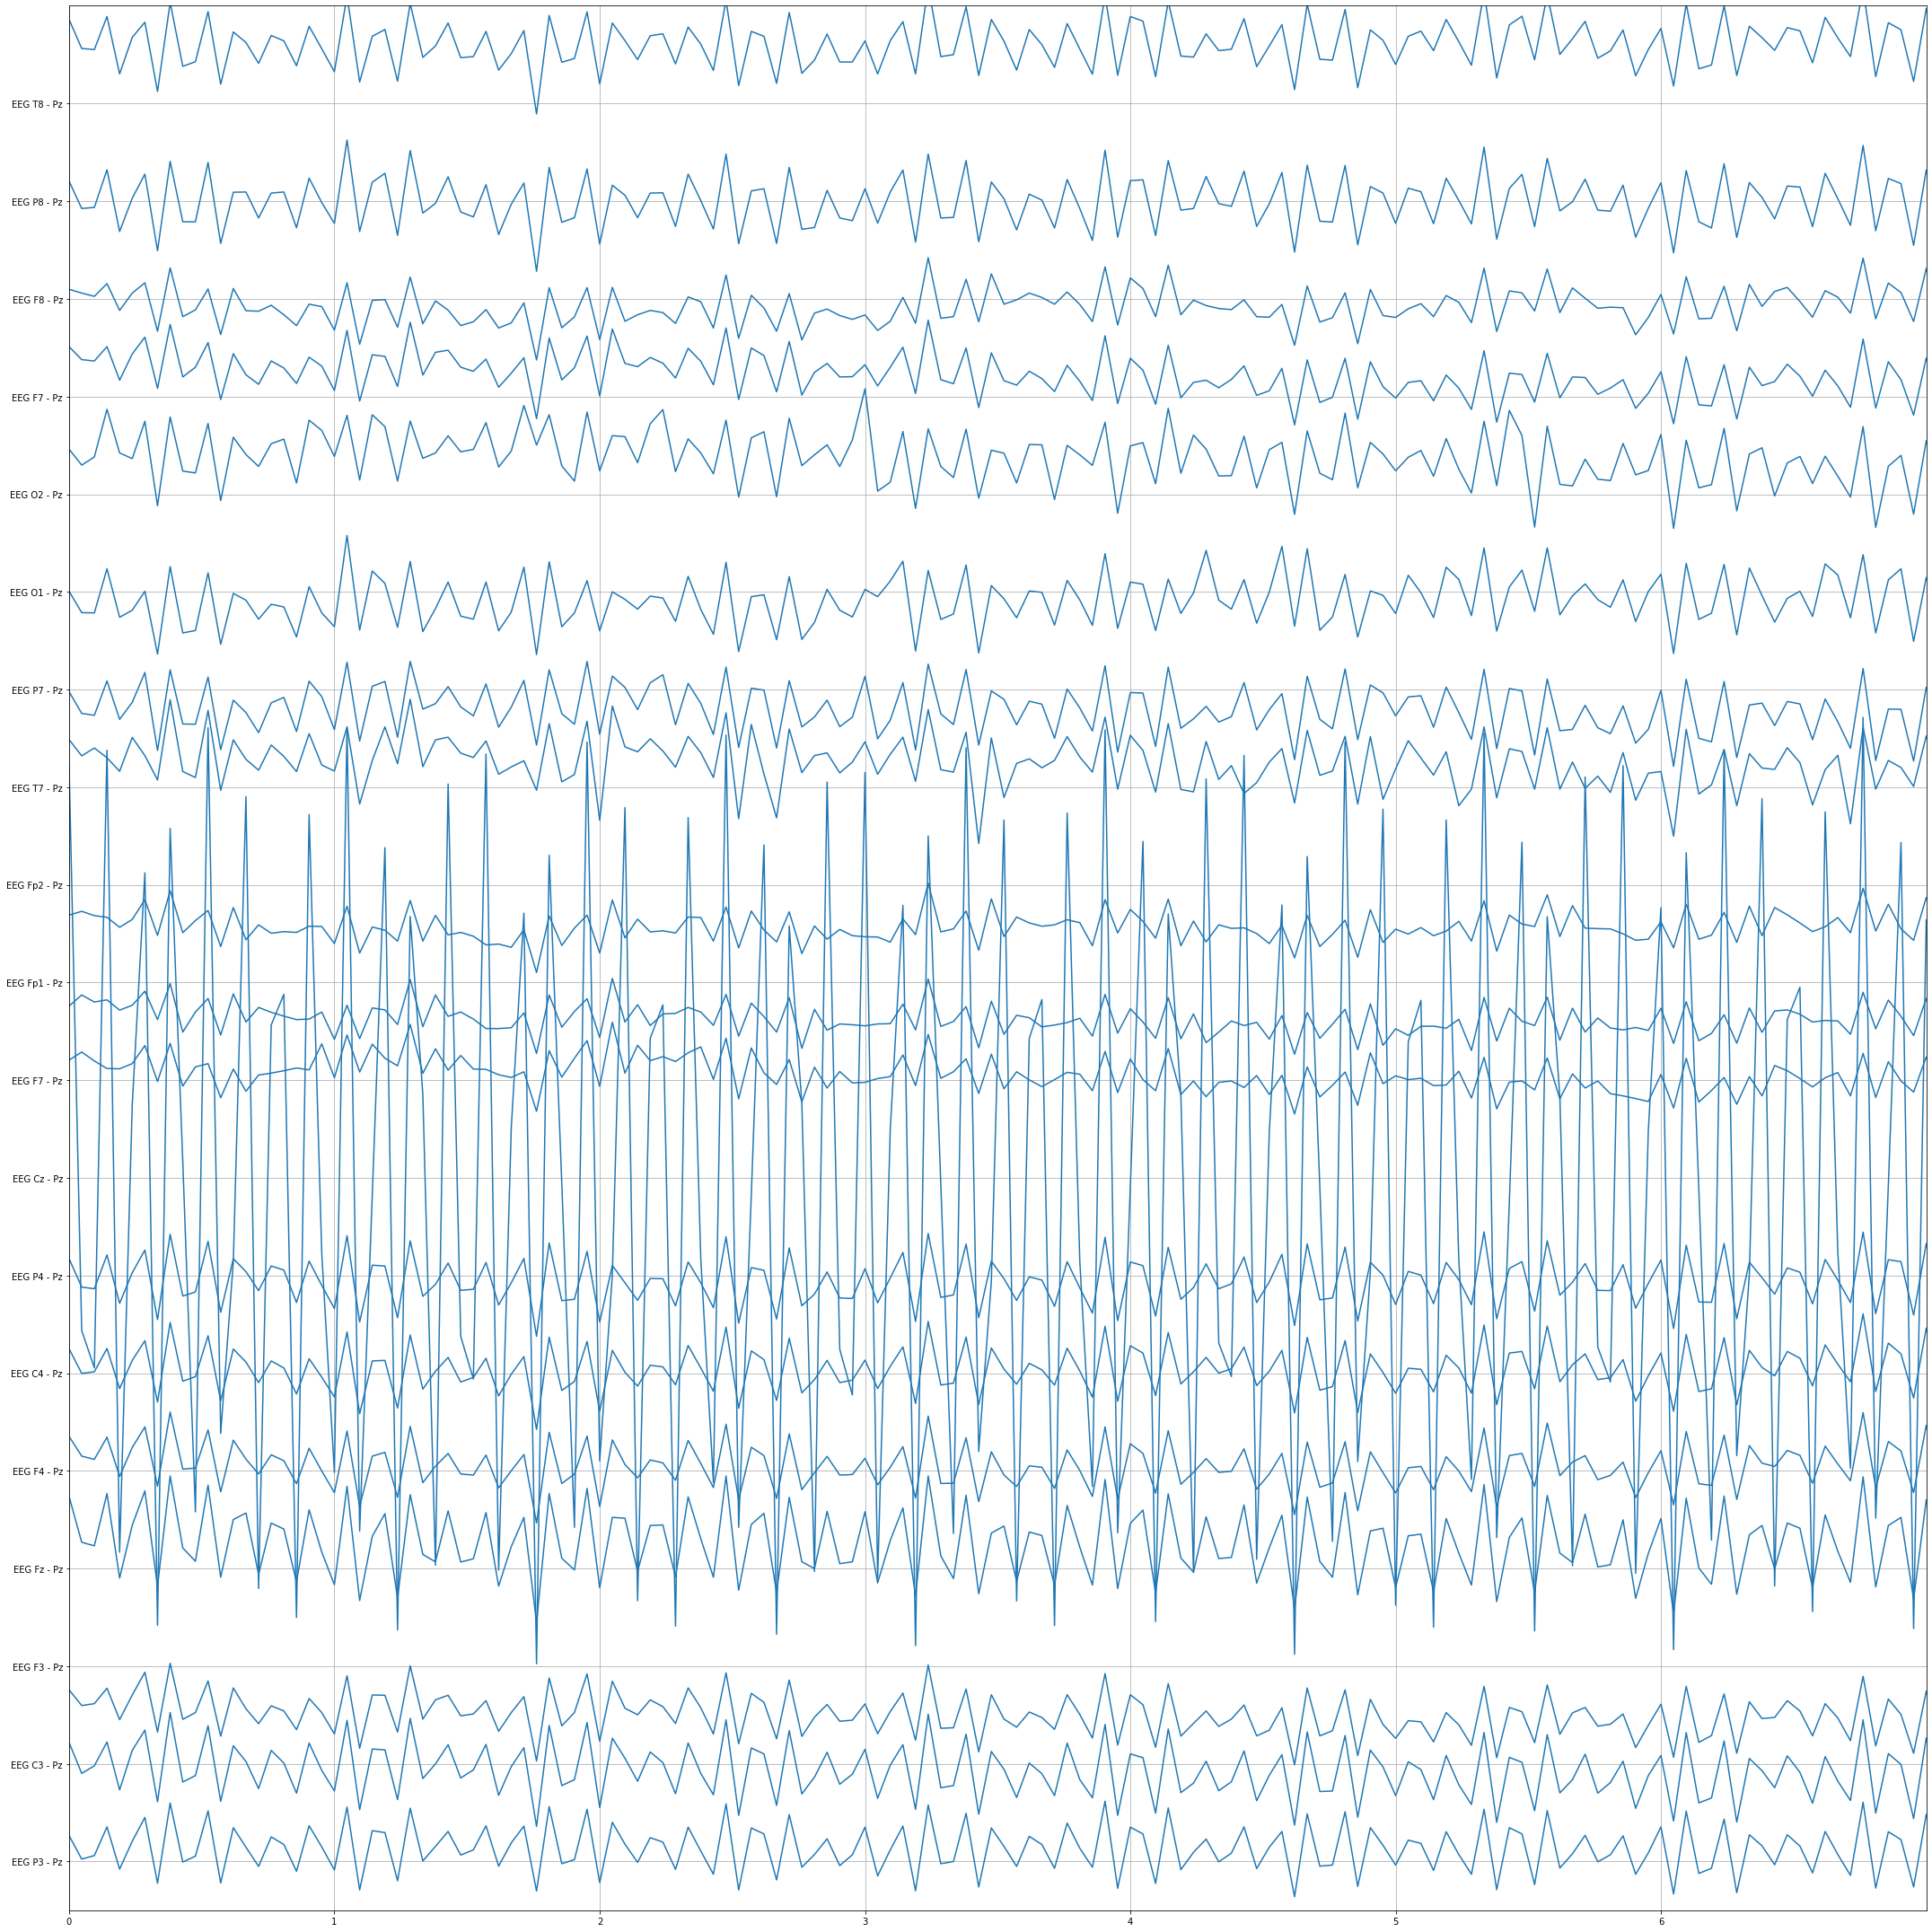

In [65]:
size = 30
fig = plt.figure(figsize=(size,size))
n_rows = 19
n_samples = 2100
data = dataTrial1[:,12,:] # (2100,19)
t = 100 * np.arange(n_samples) / n_samples

ticklocs = []
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0, 7)
ax.set_xticks(np.arange(7))
dmin = data.min()
dmax = data.max()
data *= 10
dr = dmax - dmin
y0 = dmin
y1 = (n_rows - 1) * dr + dmax * 2
ax.set_ylim(y0, y1)

segs = []
for i in range(n_rows):
    segs.append(np.column_stack((t, data[:, i])))
    ticklocs.append(i * dr)
    
offsets = np.zeros((n_rows, 2), dtype=float)
offsets[:, 1] = ticklocs

lines = LineCollection(segs, offsets=offsets, transOffset=None)
ax.add_collection(lines)

ax.set_yticks(ticklocs)
ax.set_yticklabels(chanNameUsed)

plt.grid(True)
plt.tight_layout()
plt.show()